In [2]:
%pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

df=secondary_mushroom['data']['features']
df['target'] = y
df


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,target
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p


## 1. Exploratory Data Analysis (EDA)


### 1.1 Handle missing values and duplicates

In [8]:
y.value_counts()

class
p        33888
e        27181
Name: count, dtype: int64

In [9]:
secondary_mushroom.variables.loc[secondary_mushroom.variables['missing_values'] == 'yes',['name','type']]

,name,type
3,cap-surface,Categorical
6,gill-attachment,Categorical
7,gill-spacing,Categorical
11,stem-root,Categorical
12,stem-surface,Categorical
14,veil-type,Categorical
15,veil-color,Categorical
17,ring-type,Categorical
18,spore-print-color,Categorical


In [10]:
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
target                      0
dtype: int64

In [11]:

df[df['spore-print-color'].isna()]['target'].value_counts()


target
p    29299
e    25416
Name: count, dtype: int64

In [12]:
df[df['spore-print-color'].notna()]['spore-print-color'].value_counts()

spore-print-color
k    2118
p    1259
w    1212
n    1059
g     353
u     182
r     171
Name: count, dtype: int64

In [13]:
df[df['spore-print-color'].notna()] .groupby('target')['spore-print-color'] .value_counts()


target  spore-print-color
e       w                     706
        g                     353
        k                     353
        p                     353
p       k                    1765
        n                    1059
        p                     906
        w                     506
        u                     182
        r                     171
Name: count, dtype: int64

In [14]:
df.drop(columns=['spore-print-color'], inplace=True)


---

In [15]:
df[df['veil-type'].notna()]['veil-type'].value_counts()

veil-type
u    3177
Name: count, dtype: int64

In [16]:
df[df['veil-type'].notna()]['target'].value_counts()


target
p    2118
e    1059
Name: count, dtype: int64

In [17]:
df[df['veil-color'].isna() & df['veil-type'].isna()]

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season,target
2824,13.87,f,y,n,f,NaN,NaN,w,19.78,19.85,s,NaN,n,NaN,NaN,t,m,m,a,e
2825,18.38,p,y,w,f,NaN,NaN,w,22.73,17.63,s,NaN,n,NaN,NaN,t,m,m,a,e
2826,18.05,f,y,n,f,NaN,NaN,w,29.94,22.31,s,NaN,n,NaN,NaN,t,m,m,u,e
2827,16.67,f,y,n,f,NaN,NaN,w,23.63,19.32,s,NaN,n,NaN,NaN,t,m,d,u,e
2828,19.60,f,y,w,f,NaN,NaN,w,27.46,22.04,s,NaN,n,NaN,NaN,t,m,d,u,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,d,a,p
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,d,a,p
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,d,u,p
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,d,u,p


In [18]:
df[df['veil-color']=='f']

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season,target


In [ ]:
df['veil-color'].fillna('f', inplace=True) # tel3 mafish null values
df['veil-type'].fillna('f', inplace=True) # b3d search tel3 fi ma3ndohmsh veil

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\617490103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['veil-color'].fillna('f', inplace=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\617490103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

---

In [20]:
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type                   0
veil-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
target                      0
dtype: int64

In [21]:
df['ring-type'].value_counts()

ring-type
f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: count, dtype: int64

In [22]:
df[df['ring-type'].isna()]['target'].value_counts()


target
e    1412
p    1059
Name: count, dtype: int64

In [23]:
df = df.dropna(subset=['ring-type'])


---

In [24]:
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface             13767
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9531
gill-spacing            24004
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               49420
stem-surface            36712
stem-color                  0
veil-type                   0
veil-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                      0
target                      0
dtype: int64

In [25]:
df['cap-surface'].value_counts()

cap-surface
t    7844
s    7255
y    5812
g    4724
h    4620
d    4265
e    2407
i    2225
w    2150
k    2117
l    1412
Name: count, dtype: int64

In [26]:
df.loc[df['cap-shape'] == 'p', 'cap-surface'].isnull().sum()


np.int64(455)

In [ ]:
df['cap-surface'].fillna('f', inplace=True)  #

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\3212852915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cap-surface'].fillna('f', inplace=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\3212852915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cap-surface'].fillna('f', inplace=True)


In [45]:
cap_surface_distribution = df.groupby(['target'])['cap-surface'].value_counts(dropna=False)
cap_surface_distribution


target  cap-surface
e       f              6354
        s              3985
        y              3153
        t              2656
        h              2431
        d              2049
        g              1964
        e              1059
        w               862
        l               706
        i               369
        k               181
p       f              7413
        t              5188
        s              3270
        g              2760
        y              2659
        d              2216
        h              2189
        k              1936
        i              1856
        e              1348
        w              1288
        l               706
Name: count, dtype: int64

---------

In [28]:
df['stem-root'].value_counts()

stem-root
s    3177
b    2824
r    1412
f    1059
c     706
Name: count, dtype: int64

In [29]:
df[df['stem-root'].notna()].groupby('target')['stem-root'].value_counts()


target  stem-root
e       b            1765
        s            1412
p       s            1765
        r            1412
        b            1059
        f            1059
        c             706
Name: count, dtype: int64

In [30]:
df.drop(columns=['stem-root'], inplace=True)

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\2438287062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['stem-root'], inplace=True)


---

In [31]:
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9531
gill-spacing            24004
gill-color                  0
stem-height                 0
stem-width                  0
stem-surface            36712
stem-color                  0
veil-type                   0
veil-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                      0
target                      0
dtype: int64

In [32]:
df['stem-surface'].value_counts()

stem-surface
s    6025
y    4587
i    3690
t    2644
g    1765
k    1581
f    1059
h     535
Name: count, dtype: int64

In [37]:
df.groupby('target')['stem-surface'].value_counts(dropna=False)


target  stem-surface
e       NaN             17650
        s                3547
        y                1579
        i                1239
        t                1232
        k                 522
p       NaN             19062
        y                3008
        s                2478
        i                2451
        g                1765
        t                1412
        f                1059
        k                1059
        h                 535
Name: count, dtype: int64

In [38]:
df['stem-surface'].fillna('f', inplace=True)

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\2608883012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stem-surface'].fillna('f', inplace=True)


---

In [39]:
df.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9531
gill-spacing            24004
gill-color                  0
stem-height                 0
stem-width                  0
stem-surface                0
stem-color                  0
veil-type                   0
veil-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                      0
target                      0
dtype: int64

In [42]:
df['gill-spacing'].value_counts()

gill-spacing
c    23651
d     7413
f     3530
Name: count, dtype: int64

In [43]:
df.groupby('target')['gill-spacing'].value_counts(dropna=False)


target  gill-spacing
e       NaN             10237
        c                9884
        d                4236
        f                1412
p       c               13767
        NaN             13767
        d                3177
        f                2118
Name: count, dtype: int64

In [46]:
df['gill-spacing'].fillna('N', inplace=True)

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\4073916734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gill-spacing'].fillna('N', inplace=True)


---

In [47]:
df['gill-attachment'].value_counts()

gill-attachment
a    12000
d     9886
x     7060
p     5648
s     5648
e     5295
f     3530
Name: count, dtype: int64

In [52]:
df.groupby('target')['gill-attachment'].value_counts(dropna=False)


target  gill-attachment
e       a                  4580
        d                  3892
        p                  3883
        NaN                3530
        e                  3177
        x                  2824
        s                  2471
        f                  1412
p       a                  7420
        NaN                6001
        d                  5994
        x                  4236
        s                  3177
        e                  2118
        f                  2118
        p                  1765
Name: count, dtype: int64

In [53]:
df['gill-attachment'].fillna('N', inplace=True)

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\2290446301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gill-attachment'].fillna('N', inplace=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_26064\2290446301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gill-attachment'].fillna('N', inplace=True)


---

In [57]:
df[df.duplicated()]


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,target
9863,1.14,x,g,w,f,a,d,w,3.13,1.78,...,NaN,e,NaN,NaN,f,f,NaN,d,u,p
12978,0.72,x,g,y,f,NaN,NaN,y,3.51,0.77,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
56526,4.27,o,s,n,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
56533,4.29,o,t,w,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
56576,4.59,o,s,w,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58237,2.94,o,l,g,f,f,f,f,0.00,0.00,...,f,f,NaN,NaN,f,f,NaN,d,u,p
58239,3.30,o,l,g,f,f,f,f,0.00,0.00,...,f,f,NaN,NaN,f,f,NaN,d,u,p
58241,3.13,o,l,g,f,f,f,f,0.00,0.00,...,f,f,NaN,NaN,f,f,NaN,d,w,p
58242,2.83,o,l,g,f,f,f,f,0.00,0.00,...,f,f,NaN,NaN,f,f,NaN,d,u,p


In [58]:
df.drop_duplicates(inplace=True)
df

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,target
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p


###
<hr style="border:2px solid blue">


### 1.2 Explore correlations between features and the target

#### **Numerical Features**

In [63]:
df.describe()

,cap-diameter,stem-height,stem-width
count,60923.000000,60923.000000,60923.000000
mean,6.741957,6.597202,12.178484
std,5.268435,3.358757,10.030361
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.250000
50%,5.880000,5.960000,10.220000
75%,8.550000,7.750000,16.580000
max,62.340000,33.920000,103.910000


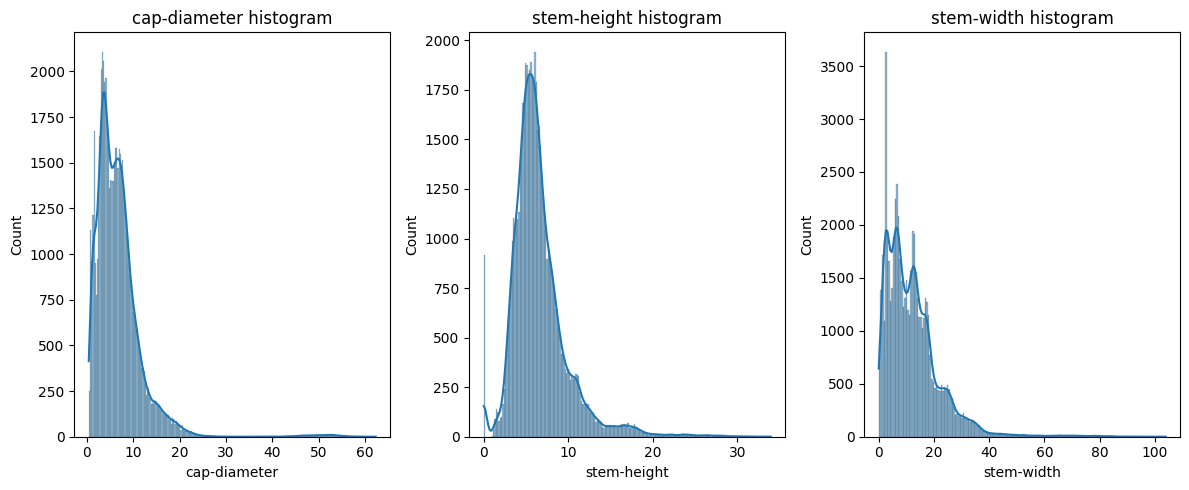

In [78]:
features = ['cap-diameter', 'stem-height', 'stem-width']
i=0
plt.figure(figsize=(12, 5))  

for bf in features:
            plt.subplot(1, 3, i+1)
            sns.histplot(x=bf, data=df,kde=True)
            plt.title(f'{bf} histogram')
            i+=1
plt.tight_layout()
plt.show()

b3d search el 60 tmm

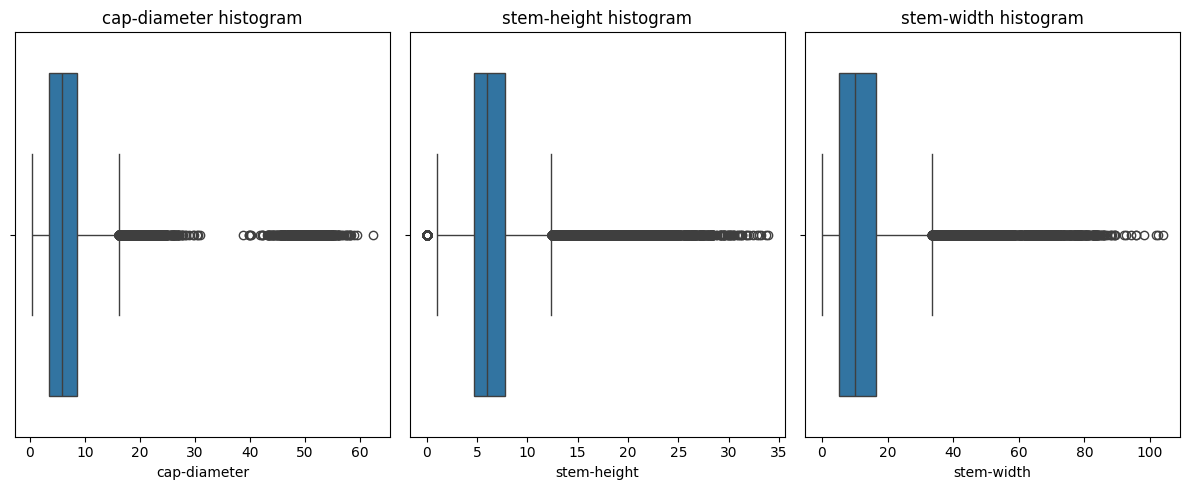

In [ ]:
features = ['cap-diameter', 'stem-height', 'stem-width']
i=0
plt.figure(figsize=(12, 5))  

for bf in features:
            plt.subplot(1, 3, i+1)
            sns.boxplot(x=bf, data=df)
            plt.title(f'{bf} boxplot')
            i+=1
plt.tight_layout()
plt.show()

OUTLIERS KETIR BS B3D SEARCH EL VALUES MOMKEN TEHSAL 3ADY F8ALT NSHILHOM NE3ML B2A ROBUST SCALER AW LOG SCALER

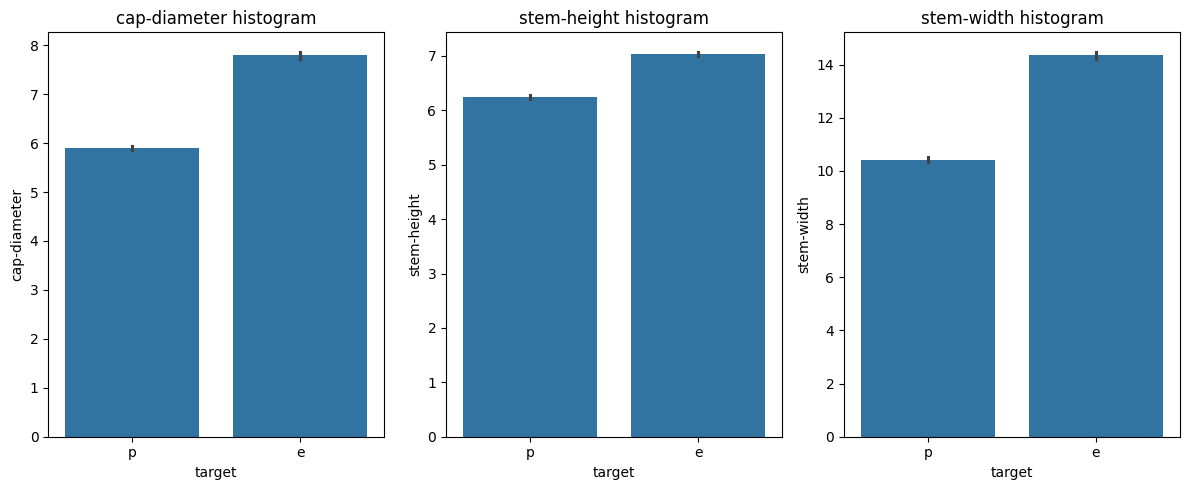

In [81]:
features = ['cap-diameter', 'stem-height', 'stem-width']
i=0
plt.figure(figsize=(12, 5))  

for bf in features:
            plt.subplot(1, 3, i+1)
            sns.barplot(y=bf,x='target', data=df)
            plt.title(f'{bf} histogram')
            i+=1
plt.tight_layout()
plt.show()

8aliban kol ma el values tezid el nesba beta3t el e betzid

##### **ANOVA Test**

In [82]:
from sklearn.feature_selection import f_classif
features = ['cap-diameter', 'stem-height', 'stem-width']
X = df[features]
y = df['target']

# Step 2: Apply ANOVA (f_classif) to test significance of features
F_values, p_values = f_classif(X, y)

# Step 3: Display results
for i, feature in enumerate(features):
    print(f"{feature}: F-value = {F_values[i]:.2f}, p-value = {p_values[i]:.3f}")

cap-diameter: F-value = 2040.56, p-value = 0.000
stem-height: F-value = 861.41, p-value = 0.000
stem-width: F-value = 2415.87, p-value = 0.000


eshta useful features